In [19]:
import pandas
dt = pandas.read_csv('Rainfall_data.csv')
dt


,Index,Temperature,Humidity%,Rain
0,0,34,74.2,Yes
1,1,19,68.2,No
2,2,28,67.2,Yes
3,3,29,66.6,Yes
4,4,26,57.9,Yes
...,...,...,...,...
19995,19995,30,77.9,Yes
19996,19996,20,74.8,Yes
19997,19997,14,69.4,No
19998,19998,20,60.6,No


In [20]:
from sklearn.model_selection import train_test_split

# Creating input and output variables
Inp = dt.drop(columns=['Index', 'Rain'])      # 2D-array
Out = dt['Rain']                              # 1D-array

# Split data into training and testing sets
inp_x, tst_x, out_y, tst_y = train_test_split(Inp, Out, test_size = 0.05)


In [21]:
from sklearn.tree import DecisionTreeClassifier
CModel = DecisionTreeClassifier()

# Train our model, with the input x values and the output y values
CModel.fit(inp_x, out_y)


DecisionTreeClassifier()

In [22]:
# Make a prediction with the usage of the created model
CModel.predict([ [33,70],
                 [20, 55]])


array(['Yes', 'No'], dtype=object)

In [23]:
# Make a variable that stores the predicted values from the testing set of x
pred_y = CModel.predict(tst_x)


In [24]:
# Create a dataframe for storing the predicted values and the actual outcome
compare = pandas.DataFrame({'Actual Values': tst_y.values, 
                            'Predicted Values': pred_y.flatten()})

compare


,Actual Values,Predicted Values
0,Yes,Yes
1,Yes,No
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes
...,...,...
995,No,Yes
996,No,No
997,No,No
998,Yes,Yes


In [25]:
# Convert the string values ('Yes', 'No') into numerical values (1, 0)
from sklearn.preprocessing import LabelEncoder
RainEnc = LabelEncoder()
RainEnc.fit(['Yes', 'No'])


LabelEncoder()

In [26]:
compare['Actual Values'] = RainEnc.transform(compare['Actual Values'])
compare['Predicted Values'] = RainEnc.transform(compare['Predicted Values'])


<AxesSubplot:ylabel='Density'>

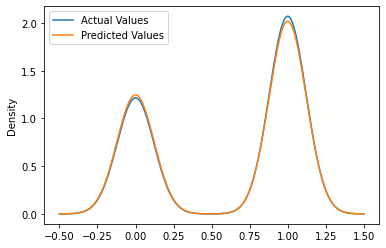

In [27]:
# Plot the results into a graph
compare.plot(kind = 'density')

# The results show that we have a very good model, with high accuracy, as the lines in the graph are very simular

In [32]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(tst_y, pred_y) * 100
print('Accuracy of the model is: ' + str(acc) + '%')


Accuracy of the model is: 87.0%
